# A simple notebook to compare variant of MAP-Elites

In [1]:
#-- Necessary Imports
import numpy as np
from os.path import exists
import os
import subprocess
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib as mpl
from glob import glob

%matplotlib inline
font = {'size'   : 10}
mpl.rc('font', **font)


In [2]:
# compilation
!  clang++ -DMITCHELL -O3 -march=native -std=c++14 -I /usr/local/include/eigen3 map_elites.cpp -o map_elites_1
!  clang++ -O3 -march=native -std=c++14 -I /usr/local/include/eigen3 map_elites.cpp -o map_elites_2


In [3]:
n_replicates = 20
for i in tqdm(range(n_replicates)):
    subprocess.run(f"mkdir -p v1_{i} &&  ./map_elites_1 && cp *.dat v1_{i}", shell=True, stdout=subprocess.DEVNULL)
for i in tqdm(range(n_replicates)):
    subprocess.run(f"mkdir -p v2_{i} &&  ./map_elites_2 && cp *.dat v2_{i}", shell=True, stdout=subprocess.DEVNULL)



100%|██████████| 20/20 [05:15<00:00, 15.77s/it]


In [5]:
def load_data(path):
    l = glob(path)
    d = []
    x = []
    for i in l:
        data = np.loadtxt(i)
        x = data[:,0]
        d += [data[:,1]]
    return np.array(d), x

v1, x = load_data("v1*/qd.dat")
v2, x = load_data("v2*/qd.dat")
print(v1.shape, v2.shape)

def stats(d):
    med = np.median(d, axis=0)
    p25 = np.percentile(d, 25, axis=0)
    p75 = np.percentile(d, 75, axis=0)
    return med, p25, p75

v1_s = stats(v1)
v2_s = stats(v2)

NameError: name 'x' is not defined

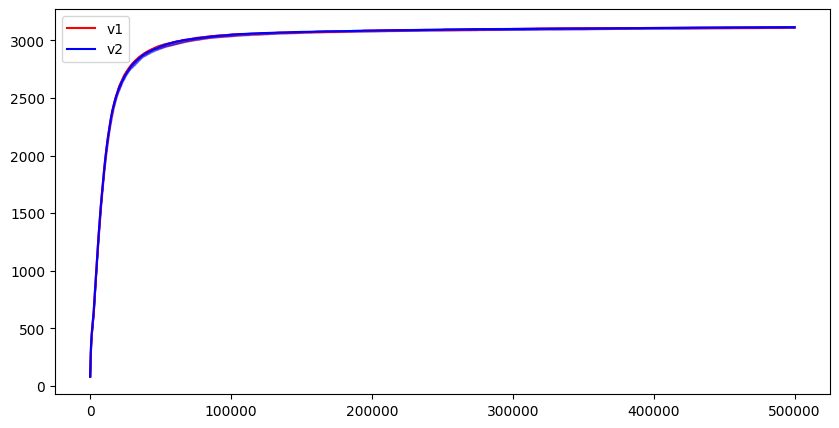

In [ ]:
fig = plt.figure(figsize=(10,5))

ax = fig.add_subplot(111)
ax.fill_between(x, v1_s[1], v1_s[2], color='red', alpha=0.5)
ax.plot(x, v1_s[0],color='red', label='v1')

ax.fill_between(x, v2_s[1], v2_s[2], color='blue', alpha=0.5)
ax.plot(x, v2_s[0],color='blue', label="v2")
ax.legend()
